In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = pd.read_csv("data.csv")
data

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,"Watamote: No Matter How I Look at It, It's You...",TV,12,5.0,2013,2013,"Tomoko Kuroki is eager to begin her new, glamo...",No,4649,199,3.633,3100.0,Others,No,Other
6519,Eight Clouds Rising,OVA,2,44.5,1997,1997,Kuraki has taken his grandfather’s ancient swo...,No,341,9,2.573,208.0,Studio Pierrot,No,Other
6520,Ishifuro: Ryuu no Tani to Taiyou no Toride,Music Video,1,4.0,2016,2016,NaN,No,25,0,1.749,14.0,Others,No,Other
6521,Sword Art Online: Alicization,TV,24,7.5,2018,2019,"Kirito awakens in a vast, fantastical forest f...",Yes,4649,199,4.145,3100.0,A-1 Pictures,No,Other


In [5]:
data.describe()

,eps,duration,startYr,finishYr,watched,watching,rating,votes
count,6523.000000,6248.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6496.000000
mean,8.716235,18.396287,2005.241147,2005.575349,1347.948643,57.445654,2.962553,906.253233
std,11.002479,20.949350,12.911035,12.568169,1737.138112,76.527405,0.760486,1171.677648
min,1.000000,1.000000,1967.000000,1970.000000,5.000000,0.000000,1.111000,10.000000
25%,1.000000,5.000000,2000.000000,2000.000000,56.000000,2.000000,2.371000,34.000000
50%,1.000000,7.000000,2010.000000,2010.000000,349.000000,13.000000,2.944000,227.500000
75%,12.000000,25.000000,2015.000000,2015.000000,2252.500000,98.000000,3.568000,1567.750000
max,34.000000,67.000000,2020.000000,2020.000000,4649.000000,199.000000,4.702000,3100.000000


In [6]:
data.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


In [6]:
data.tail()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
6518,"Watamote: No Matter How I Look at It, It's You...",TV,12,5.0,2013,2013,"Tomoko Kuroki is eager to begin her new, glamo...",No,4649,199,3.633,3100.0,Others,No,Other
6519,Eight Clouds Rising,OVA,2,44.5,1997,1997,Kuraki has taken his grandfather’s ancient swo...,No,341,9,2.573,208.0,Studio Pierrot,No,Other
6520,Ishifuro: Ryuu no Tani to Taiyou no Toride,Music Video,1,4.0,2016,2016,NaN,No,25,0,1.749,14.0,Others,No,Other
6521,Sword Art Online: Alicization,TV,24,7.5,2018,2019,"Kirito awakens in a vast, fantastical forest f...",Yes,4649,199,4.145,3100.0,A-1 Pictures,No,Other
6522,xxxHOLiC Kei,TV,13,12.0,2008,2008,"Watanuki, who is able to see the spirit world,...",No,4649,199,4.399,3100.0,Production I.G,No,Other


In [8]:
data.shape

(6523, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [7]:
df1=data.copy()

df1.mediaType.fillna("Other", inplace = True)

df1["duration"] = df1["duration"].fillna(
    value=df1.groupby(["genre", "mediaType"])["duration"].transform("median")
)

df1["votes"] = df1["votes"].fillna(
    value=df1.groupby(["genre", "mediaType"])["votes"].transform("median")
)

In [8]:
df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             8
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [9]:
df1["duration"] = df1["duration"].fillna(
    value=df1.groupby(["genre"])["duration"].transform("median")
)

df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [10]:
df1["years_running"] = df1["finishYr"] - df1["startYr"]
df1.drop(["startYr", "finishYr"], axis = 1, inplace = True)
df1.head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


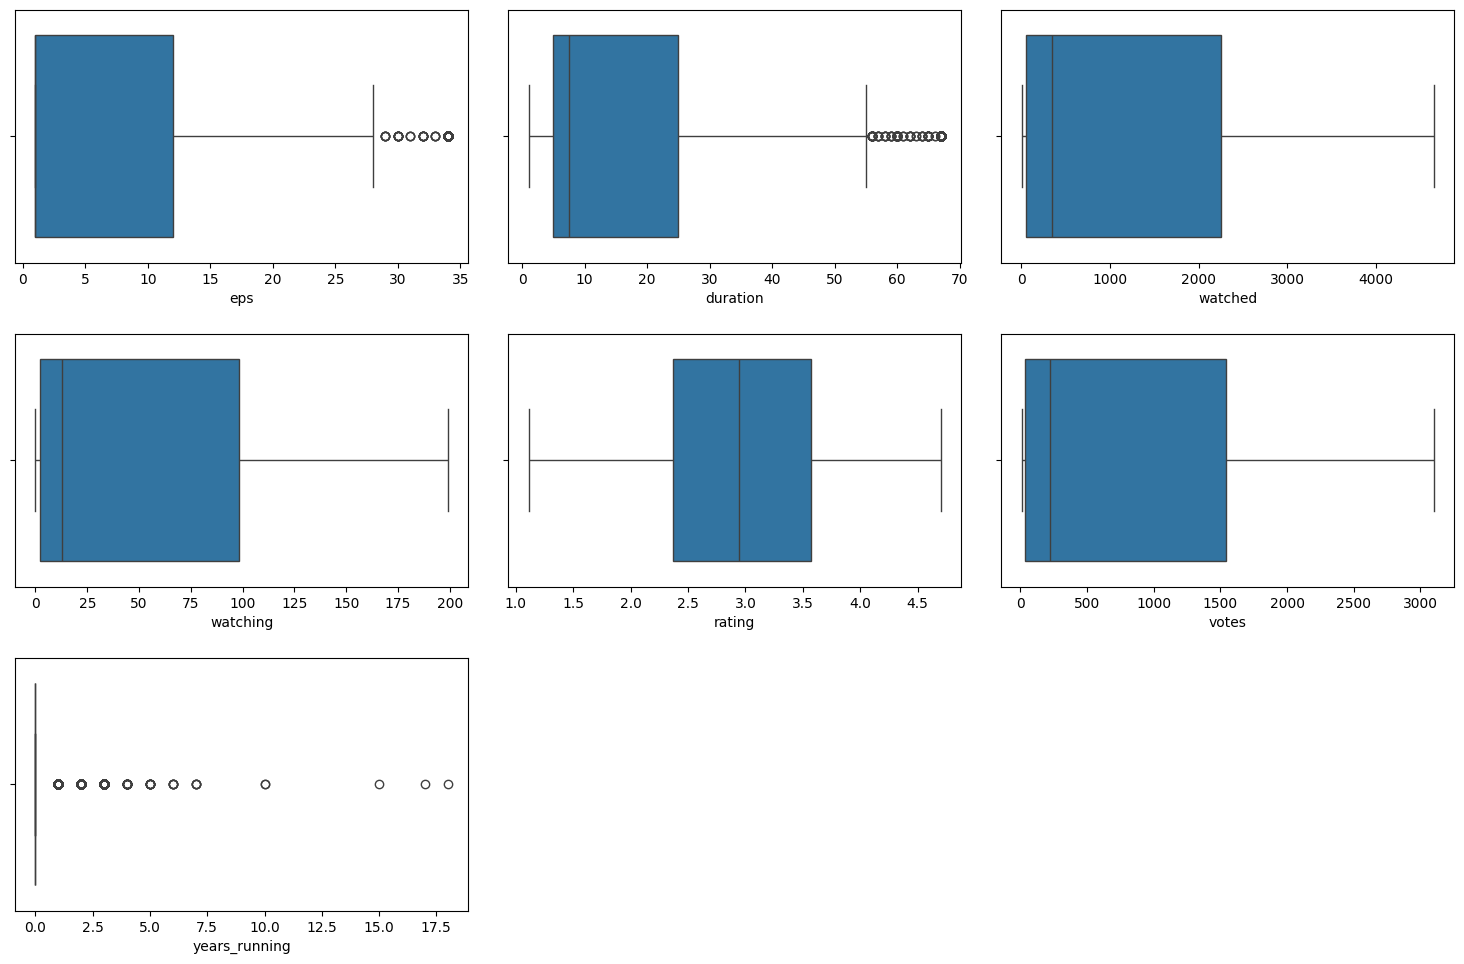

In [18]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data = df1, x = variable)
    plt.tight_layout(pad = 2)

plt.show()

In [19]:
df1.drop(["title", "description"], axis = 1, inplace = True)
df1.head()

,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


In [20]:
df2 = df1.copy()

In [24]:
x = df2.drop(["rating"], axis = 1)
y = df2["rating"]

x = sm.add_constant(x)

x = pd.get_dummies(
    x,
    columns = x.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True
)
x.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1.0,1,5.0,10,0,10.0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,46.0,1630,16,1103.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1,67.0,4649,184,3100.0,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.0,1,4.0,346,8,234.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:
x = x.astype(float)
x.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1.0,67.0,4649.0,86.0,3100.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,5.0,10.0,0.0,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,46.0,1630.0,16.0,1103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,67.0,4649.0,184.0,3100.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,4.0,346.0,8.0,234.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.3, random_state = 1)

print("Number of rows in train data = ", x_train.shape[0])
print("Number of rows in test data = ", x_test.shape[0])

Number of rows in train data =  4566
Number of rows in test data =  1957


In [29]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     357.4
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:21:53   Log-Likelihood:                -2307.9
No. Observations:                4566   AIC:                             4684.
Df Residuals:                    4532   BIC:                             4902.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [30]:
def model_performance_regression(model, predictors, target):

    pred = model.predict(predictors)

    r2 = r2_score(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
        },index = [0]
    )
    return df_perf

In [31]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared
0,0.40112,0.330417,0.722387


In [32]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared
0,0.413096,0.340426,0.703053
